In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder 
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("../Dataset/gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


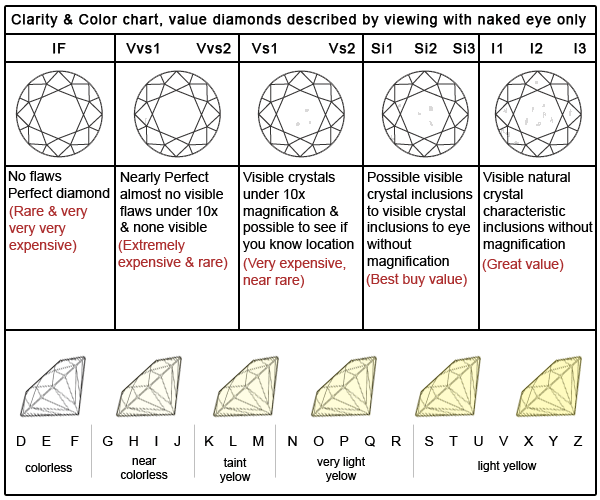

In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<Axes: >

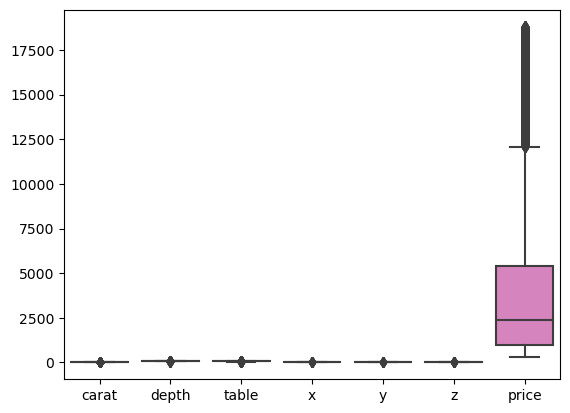

In [7]:
sns.boxplot(df)

In [8]:
categorical_columns = df.columns[df.dtypes == "object"]
numerical_columns = df.columns[df.dtypes!="object"]

<Axes: >

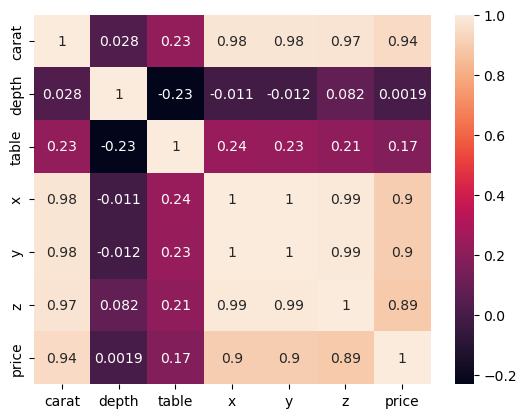

In [9]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

we can clearly see that carat is highly correlation with x,y,z and the target column

<Axes: >

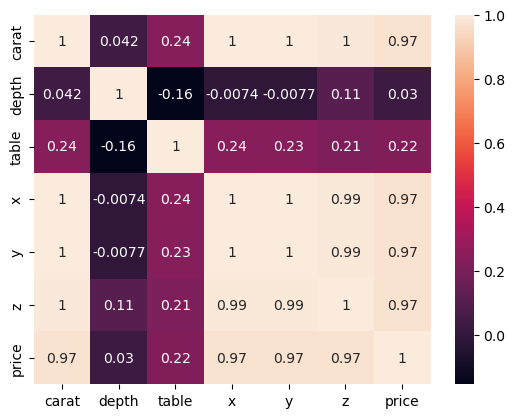

In [10]:
sns.heatmap(df[numerical_columns].corr(method="spearman"),annot=True)

If we look carefully we can see this in spearman correlation we get correlation between carat &x,y,z as 1 so ideally we can drop x,y,z columns and only take carat in consideration

In [11]:
df.drop(["x","y","z"],axis=1,inplace=True)

now in order to deal with categorical data cut,color,clarity all of them are of ordinal type so we cannot just encode them directly using labelencoder because then it will treat out data as nominal data 

In [12]:
df["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [13]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [14]:
df["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [15]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
clarity_categories = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
color_categories = ["D","E","F","G","H","I","J"]

In [16]:
x = df.drop("price",axis=1)
y = df["price"]

In [17]:
numerical_columns = x.columns[x.dtypes!="object"]
categorical_columns = x.columns[x.dtypes=="object"]

In [18]:
numerical_columns

Index(['carat', 'depth', 'table'], dtype='object')

In [19]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",MinMaxScaler())
    ]
)

In [20]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("encoder", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)


In [21]:
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_columns),
    ("cat_pipeline",cat_pipeline,categorical_columns)
])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [23]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train),columns = preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test),columns = preprocessor.get_feature_names_out())

In [24]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lm = LinearRegression()
lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

y_pred_train = lm.predict(x_train)
mae, rmse, r2_square=evaluate_model(y_test,y_pred)

print('Model Test Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)


print("")
print("==================================")
print("")


mae,rmse,r2_square = evaluate_model(y_pred_train,y_train)

print('Model Training Performance')
print("RMSE:",rmse)
print("MAE:",mae)
print("R2 score",r2_square*100)

Model Test Performance
RMSE: 1098.3298250883151
MAE: 806.5807066310922
R2 score 92.53490050917121


Model Training Performance
RMSE: 1102.5941850153504
MAE: 810.1204748484865
R2 score 91.9432932498895
